# Hirarchical Clustering For Crime Dataset

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
crime_h=pd.read_csv('Universities (1).csv')

In [3]:
crime_h.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

## Normalizing Data

In [6]:
df_norm = norm_func(crime_h.iloc[:,1:])

In [7]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


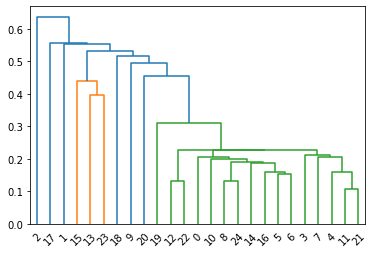

In [8]:
# creating dendrogram For single linkage
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

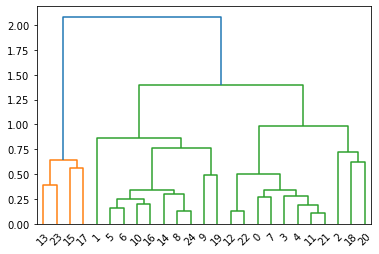

In [9]:
# creating dendrogram For Complete linkage
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

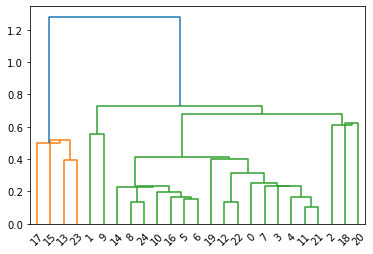

In [10]:
# creating dendrogram For Centroid linkage
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

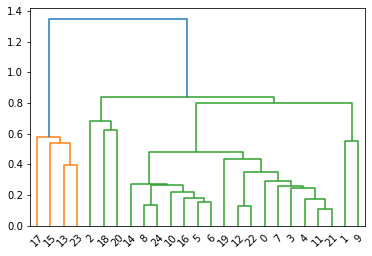

In [11]:
# creating dendrogram For average linkage
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [15]:
# creating clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [24]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [25]:
df_norm['h_clusterid'] = y_hc

In [26]:
df_norm


,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,3
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,1
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,3
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,3
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,3
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,3
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,3
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,3
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,1


In [27]:
df_norm['h_clusterid'] = y_hc

In [28]:
pd.concat([df_norm['h_clusterid'],crime_h],axis=1)

,h_clusterid,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,3,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,3,Columbia,1310,76,24,12,31510,88
4,3,Cornell,1280,83,33,13,21864,90
5,3,Dartmouth,1340,89,23,10,32162,95
6,3,Duke,1315,90,30,12,31585,95
7,3,Georgetown,1255,74,24,12,20126,92
8,3,Harvard,1400,91,14,11,39525,97
9,1,JohnsHopkins,1305,75,44,7,58691,87


# K-Means Clustering For Crime DataSet

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [32]:
crime_k=pd.read_csv('Universities (1).csv')

In [33]:
crime_k.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [34]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

## Normalizing Data

In [36]:
df_norm=norm_func(crime_k.iloc[:,1:])

In [37]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [38]:
## Applying Elboe Method for Finding best K-Value

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


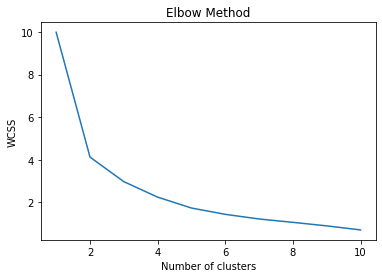

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [45]:
#Assign clusters to the data set
crime_k['clusterid_new'] = clusters_new.labels_

In [46]:
crime_k

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


# DBSCAN For Crime Dataset

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("Universities (1).csv")

In [50]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [51]:
df_db=df.iloc[:,1:]

In [52]:
df_db.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [53]:
array=df_db.values

In [54]:
array

array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

## Standardizing The Data

In [55]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [56]:
X

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [57]:
dbscan = DBSCAN(eps=0.8, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=8)

In [58]:
#Noisy samples are given as the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [59]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [60]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [61]:
pd.concat([df_db,cl],axis=1)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,1310,89,22,13,22704,94,-1
1,1415,100,25,6,63575,81,-1
2,1260,62,59,9,25026,72,-1
3,1310,76,24,12,31510,88,-1
4,1280,83,33,13,21864,90,-1
5,1340,89,23,10,32162,95,-1
6,1315,90,30,12,31585,95,-1
7,1255,74,24,12,20126,92,-1
8,1400,91,14,11,39525,97,-1
9,1305,75,44,7,58691,87,-1
